In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from helpers import load_data_with_columns, date_to_float

In [2]:
DATAFOLDER = '../data/'
character_metadata = load_data_with_columns(DATAFOLDER, 'character.metadata.tsv')
movie_metadata = load_data_with_columns(DATAFOLDER, 'movie.metadata.tsv')

movie_metadata = date_to_float(movie_metadata, 'movie_release_date')

character_metadata = date_to_float(character_metadata, 'movie_release_date')
character_metadata = date_to_float(character_metadata, 'actor_birth_date')

display(movie_metadata.sample(10))
display(character_metadata.sample(10))


,movie_wikipedia_id,movie_freebase_id,movie_name,movie_release_date,box_office,runtime,languages,countries,genres
31309,23801123,/m/06_vmwj,Blood of the Virgins,1967.0,NaN,NaN,[Spanish Language],[Argentina],[Horror]
47640,28948624,/m/0dgqblh,Alice in Wonderland,1983.0,NaN,90.0,[English Language],[],"[Family Film, Adventure, Musical]"
4451,8037429,/m/026pcr0,The Andromeda Nebula,1967.0,NaN,77.0,[Russian Language],[Soviet Union],[Science Fiction]
28427,24917972,/m/09gpfc5,Dédé,1935.0,NaN,75.0,[French Language],[France],[Comedy]
66242,32809321,/m/0h3sqfh,The Mississippi Gambler,1953.0,3000000.0,99.0,[English Language],[United States of America],"[Romance Film, Action, Adventure]"
18347,5432509,/m/0dlmgk,I'll CKBC,NaN,NaN,NaN,[],[],"[Sports, Drama]"
29373,22839796,/m/0641mfx,The Single Girls,1974.0,NaN,83.0,[English Language],[United States of America],"[Mystery, Drama, Comedy, Sexploitation]"
24544,20469847,/m/04zw10l,Jo Jo in the Stars,2003.0,NaN,12.0,[English Language],[United Kingdom],"[Short Film, Computer Animation, Drama, Animat..."
17278,28754187,/m/0ddhl8r,The Hundred Pound Window,1944.0,NaN,84.0,[English Language],[United States of America],"[Thriller, Crime Fiction, Drama]"
59149,18037643,/m/047p2j1,Virtue Is Its Own Reward,1914.0,NaN,NaN,"[Silent film, English Language]",[United States of America],"[Short Film, Silent film, Drama, Black-and-white]"


,movie_wikipedia_id,movie_freebase_id,movie_release_date,character_name,actor_birth_date,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_map_id,character_freebase_id,actor_freebase_id
156314,170858,/m/016y0b,1994.0,Moses,1934.0,M,NaN,/m/0x67,Bill Cobbs,59.0,/m/03jqm8x,/m/05px8kl,/m/06chtx
164855,8782936,/m/027jkr8,2005.0,NaN,1935.0,M,NaN,NaN,Larry Kramer,69.0,/m/02vc5mh,NaN,/m/02sfkd
180221,31123196,/m/0djb2j5,1953.0,NaN,1882.0,M,NaN,NaN,Eliot Makeham,NaN,/m/0gc5q6x,NaN,/m/0b_znz6
27891,6296845,/m/0f_tjy,1948.0,Joan Madou,1915.0,F,1.75,/m/065b6q,Ingrid Bergman,32.0,/m/0jtpzr,/m/0h29b2f,/m/0bdt8
174625,365025,/m/01_wqb,1976.0,NaN,NaN,M,NaN,NaN,Harry Ritz,NaN,/m/06zdy20,NaN,/m/06zdy23
99041,14230475,/m/03cyjl3,1998.0,NaN,1932.0,F,NaN,NaN,Avril Elgar,65.0,/m/0cv_wmn,NaN,/m/0642d7y
322212,24199883,/m/07kdry5,1992.0,NaN,1973.0,F,1.70,/m/0dryh9k,Aishwarya Rai,18.0,/m/0gw3w1y,NaN,/m/050llt
356774,22643234,/m/05zznkj,1918.0,Gio Romano,1878.0,M,NaN,NaN,Jan van Dommelen,NaN,/m/0n1njtk,/m/0n1nk92,/m/05zln80
109062,21113228,/m/05c46y6,2009.0,Mrs. Lichtenstein,NaN,F,NaN,NaN,Nealla Gordon,NaN,/m/0gdk709,/m/0h5q6mm,/m/0gdk70d
416793,32910742,/m/0gwlfnb,2013.0,Firefly,1964.0,M,1.93,/m/0d7wh,Ray Stevenson,48.0,/m/0h2xsbz,/m/0h2xsc0,/m/08996y


In [3]:
movie_metadata = movie_metadata[movie_metadata['movie_release_date'] > 1850]

In [23]:
def release_by_genre(data, genre='Silent film'):

    if genre == 'Silent film':
        date = 1926
    else:
        date = 0

    genre_films = data[data.apply(lambda x: (np.isin(genre, x['genres']))|(x['movie_release_date'] < date), axis = 1)]

    films_by_year = data[data['movie_release_date'].isin(genre_films['movie_release_date'])].groupby(by = 'movie_release_date').apply(lambda x: pd.Series({'total_nb_films': x['movie_wikipedia_id'].count()}))

    genre_films_by_year = genre_films.groupby(by = 'movie_release_date').apply(lambda x: pd.Series({'frequency': x['movie_wikipedia_id'].count()}))

    genre_films_by_year = pd.concat((genre_films_by_year, films_by_year), axis = 1)

    return genre_films, genre_films_by_year

def plot_release_by_genre(genre_films_by_year, genre = 'Silent film'):
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(genre_films_by_year.index, genre_films_by_year.frequency, color = color)
    ax1.set_xlabel('Release year')
    ax1.set_ylabel('number of movies released', color = color)
    ax1.tick_params(axis='y', labelcolor=color)
    if genre == None:
        ax1.set_title('Genre films released over the years')
    else:
        ax1.set_title('{} films released over the years'.format(genre))

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.plot(genre_films_by_year.index, genre_films_by_year.frequency/genre_films_by_year.total_nb_films, ls = '-.', color = color)
    ax2.set_ylabel('proportion of silent movies released', color = color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_yticks(ticks = np.arange(0, 1.2, 0.2), labels = [str(int(p*100))+'%' for p in np.arange(0, 1.2, 0.2)])

    fig.show()

def select_non_genre(genre, total):
    res = []
    for y in total:
        if ~np.isin(y, genre):
             res.append(y)
    return np.asarray(res)


def actors_by_genre(data_character, genre_films, genre = 'Silent', plot_samples = False, nb_samples=15):

    if genre == 'Silent':
        date = 1940
    elif genre == 'Black-and-white':
        date = 10**(12)

    #characters metadata : only movies that are silent and released before 1940
    data_character_filt = data_character[data_character['movie_wikipedia_id'].isin(genre_films['movie_wikipedia_id'])]
    data_character_filt = data_character_filt[data_character_filt['movie_release_date'] < date]

    #only actors that appear in silent movies and before 1940, but appearances are limited to silent movies
    characters_by_actor = data_character_filt.groupby(by = 'actor_name').apply(lambda x: pd.Series({'genre_appearances' : x['movie_release_date'].values,
                                                                                                        #add age info 
                                                                                                        'birth_date' : x['actor_birth_date'].values[0],
                                                                                                        'age_last_genre': x['movie_release_date'].values.max() - x['actor_birth_date'].values[0]}))

    #only movies that feature an actor that has played at least once in a silent movie
    movies_genre_actors = data_character[data_character['actor_name'].isin(characters_by_actor.index)]
    #only actors that appear in silent movies, but appearances are not limited to silent movies
    characters_by_actor_all = movies_genre_actors.groupby(by = 'actor_name').apply(lambda x: pd.Series({'total_appearances' : x['movie_release_date'].values,}))

    characters_by_actor = pd.concat((characters_by_actor, characters_by_actor_all), axis = 1)

    characters_by_actor['non_genre_appearances'] = characters_by_actor.apply(lambda x: select_non_genre(x['genre_appearances'], x['total_appearances']), axis = 1)

    #Add columns indicating the number of appearances
    characters_by_actor['nb_genre_appearances'] = characters_by_actor['genre_appearances'].apply(lambda x: x.shape[0])
    characters_by_actor['nb_total_appearances'] = characters_by_actor['total_appearances'].apply(lambda x: x.shape[0])
    characters_by_actor['nb_non_genre_appearances'] = characters_by_actor['non_genre_appearances'].apply(lambda x: x.shape[0])

    characters_by_actor['ratio'] = characters_by_actor['nb_non_genre_appearances'].values / characters_by_actor['nb_genre_appearances'].values

    cols = ['birth_date', 'age_last_genre', 'genre_appearances', 'non_genre_appearances', 'total_appearances', 'nb_genre_appearances', 'nb_non_genre_appearances', 'nb_total_appearances', 'ratio']

    characters_by_actor = characters_by_actor[cols]

    if plot_samples:

        # Keep actors who appear at least in 5 silent movies
        characters_by_actor_filt = characters_by_actor[characters_by_actor['nb_genre_appearances'] >= 5]
        years = [int(movies_genre_actors.movie_release_date.min()), int(movies_genre_actors.movie_release_date.max())]
        sample = characters_by_actor_filt.sample(nb_samples)

        fig, axes = plt.subplots(nb_samples, figsize = (7, 2*nb_samples), sharex = True)

        for i in range(nb_samples):

            axes[i].hist(sample.non_genre_appearances[i], bins = round((years[1]-years[0])/5), range=years, alpha = 0.5, label = 'non-{} films'.format(genre),)
            axes[i].hist(sample.genre_appearances[i], bins = round((years[1]-years[0])/5), range=years, alpha = 0.5, label = '{} films'.format(genre))
            axes[i].set_title(sample.index[i])
            axes[i].legend()
        fig.show()
    
    return characters_by_actor

    
def plot_distrib_actors_by_genre(characters_by_actor, genre = 'Silent'):

    plt.figure()

    plt.hist(characters_by_actor.nb_total_appearances, label = 'All films', bins = 100, range = (0, 100), histtype= 'step')
    plt.hist(characters_by_actor.nb_genre_appearances, label = '{} films'.format(genre), bins = 100, range = (0, 100), histtype= 'step')

    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Number of movies released per actor')
    plt.ylabel('Number of actors')
    plt.title('Distribution of number of movies released by an actor that has appeared in at least one {} film'.format(genre))
    plt.legend()
    plt.show()

    

/var/folders/vf/crff2gv97cs_b8t0fhjvy6800000gn/T/ipykernel_52349/494204657.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/vf/crff2gv97cs_b8t0fhjvy6800000gn/T/ipykernel_52349/494204657.py:100: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


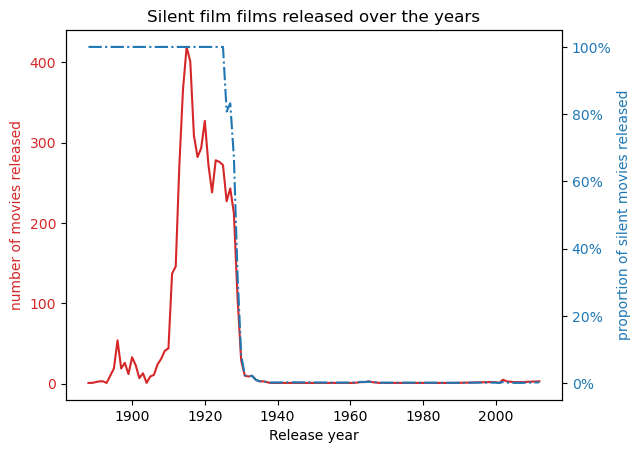

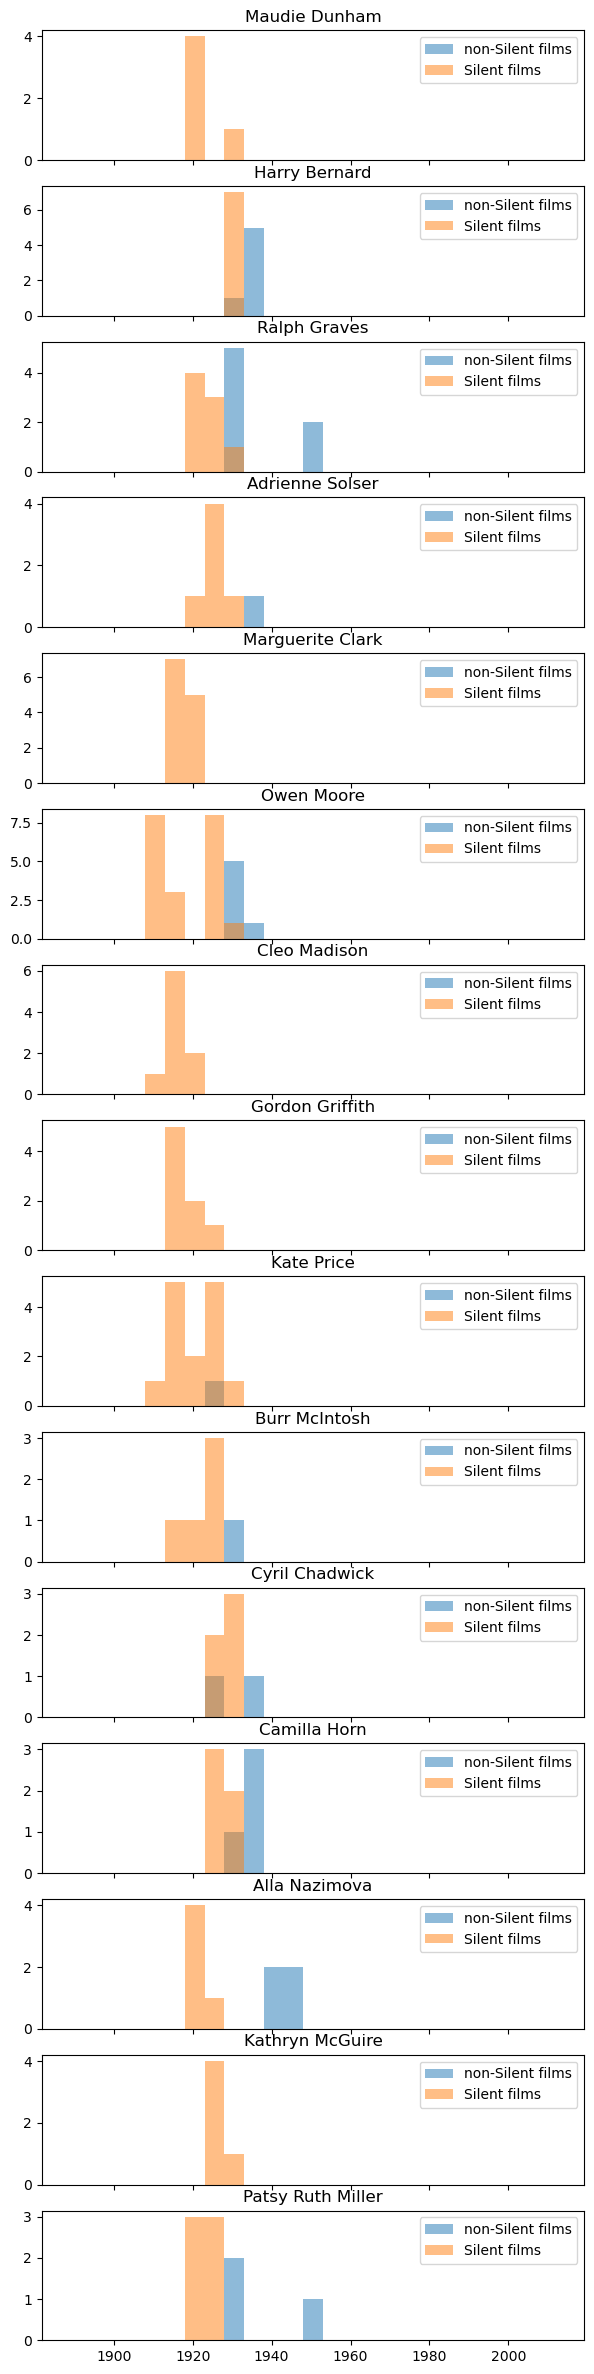

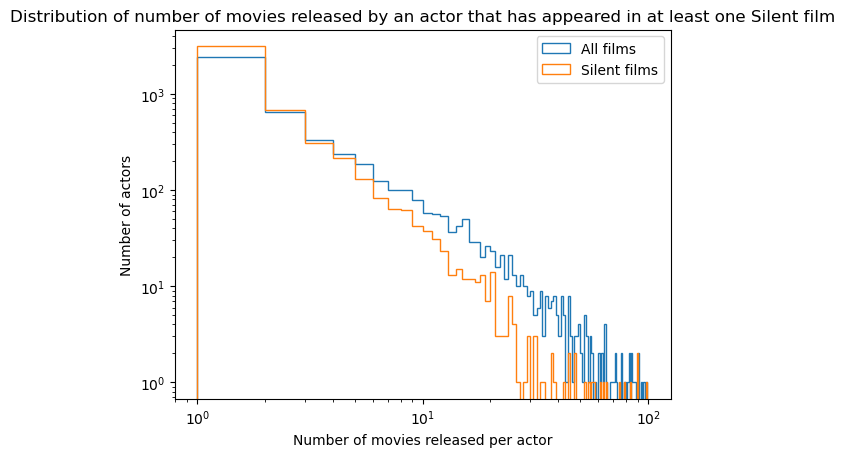

In [24]:
mute_films, mute_films_by_year = release_by_genre(movie_metadata)
plot_release_by_genre(mute_films_by_year)

actors_silent = actors_by_genre(character_metadata, mute_films, plot_samples=False)
plot_distrib_actors_by_genre(actors_silent)

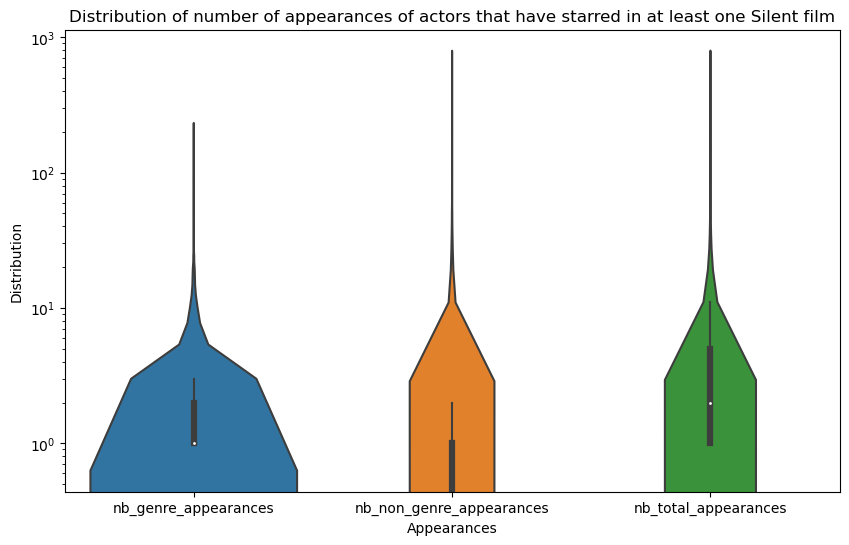

In [25]:
#Create dataframe suitable to plot violin plot for each column
df = pd.melt(actors_silent[['nb_genre_appearances', 'nb_non_genre_appearances', 'nb_total_appearances']], var_name='Appearances', value_name='Distribution')

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.violinplot(x='Appearances', y='Distribution', data=df)
plt.title('Distribution of number of appearances of actors that have starred in at least one Silent film')
plt.yscale('log')
plt.show()


In [26]:
# Create a new Dataframe containing the number of appearances of eah actor per year (1888-2015)

def test(x):
    years = []
    for year in x:
        if ~np.isin(year, years):
            years.append(year)
    return years

def test_count(x, range):
    years_appearance = test(x)
    count = []
    for year in range:
        if np.isin(year, years_appearance):
            count.append(x.tolist().count(year))
        else:
            count.append(0)
    return np.asarray(count)

years = range(int(movie_metadata.movie_release_date.min()), int(movie_metadata.movie_release_date.max()))

new_df = pd.DataFrame({'count_silent' : actors_silent['genre_appearances'].apply(lambda x : test_count(x, years)),
                       'count_non_silent' : actors_silent['non_genre_appearances'].apply(lambda x : test_count(x, years))})


In [27]:
display(new_df)

,count_silent,count_non_silent
actor_name,,
Cesarine Prinz\t,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
'Big Bill' Giddinger,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
A. Arnold,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
A. B. Imeson,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
A. Bromley Davenport,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
Zoltán Szerémy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
rambaldo de goudron,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
Ángela Henao,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Text(0.5, 1.0, 'Mean number of appearances across actors that have starred in at least one Silent film')

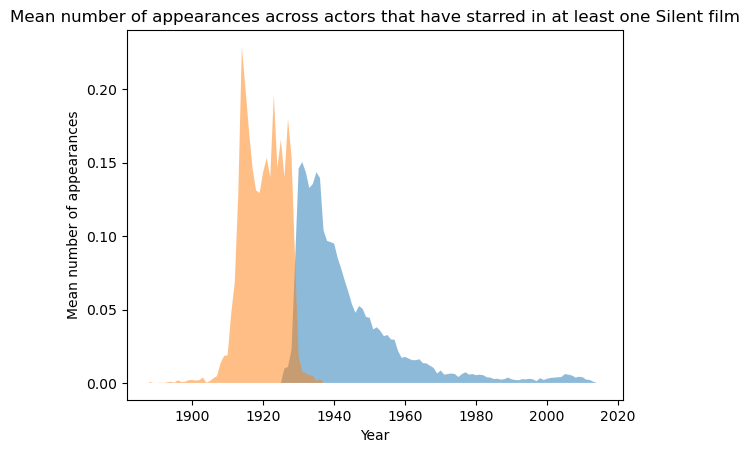

In [28]:
#Plot the mean of appearances of actors (that have starred in at least one Silent film) per year

mean_silent_years = np.mean(np.stack(new_df.count_silent.values), axis = 0)
mean_non_silent_years = np.mean(np.stack(new_df.count_non_silent.values), axis = 0)

plt.fill_between(years, mean_non_silent_years, alpha = 0.5, label = 'Non-Silent films')
plt.fill_between(years, mean_silent_years, alpha = 0.5, label = 'Silent films')
plt.ylabel('Mean number of appearances')
plt.xlabel('Year')
plt.title('Mean number of appearances across actors that have starred in at least one Silent film')


### Note: I am not sure I should use the mean since the distribution is heavy-tailed. But if I use the median, I get 0.... bc a lot of datapoints are zero

In [29]:
a = actors_silent['birth_date'].isna().sum()/actors_silent.shape[0]
b = actors_silent['age_last_genre'].isna().sum()/actors_silent.shape[0]

print('Fraction of actors whose date of birth is missing: {:.2%}'.format(a))
print('Fraction of actors whose age at latest Silent film is missing: {:.2%}'.format(b))

Fraction of actors whose date of birth is missing: 34.81%
Fraction of actors whose age at latest Silent film is missing: 34.81%


83.44% of actors that have starred in at least one silent film have not "survived" the arrival of synchrnized sound sând scores in feature films.
The "survival" criterion is defined as such: if an actor has starred in at least as many non silent films as silent films, they have "survived" this transition. 

0.68% of actors are outliers: their age at latest silent film are below 0 or above 100 



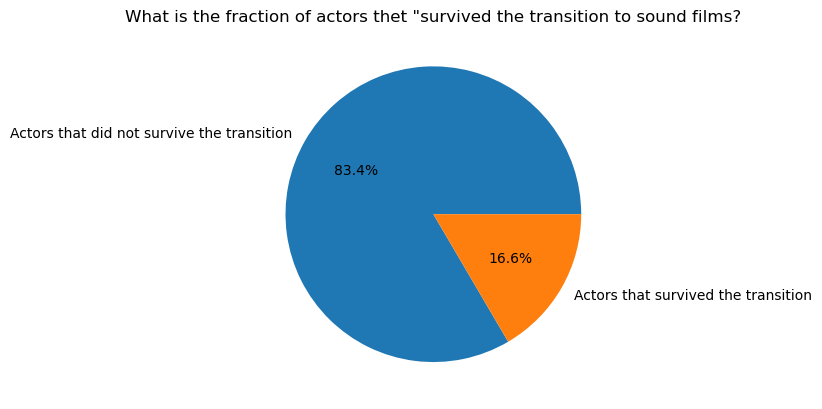

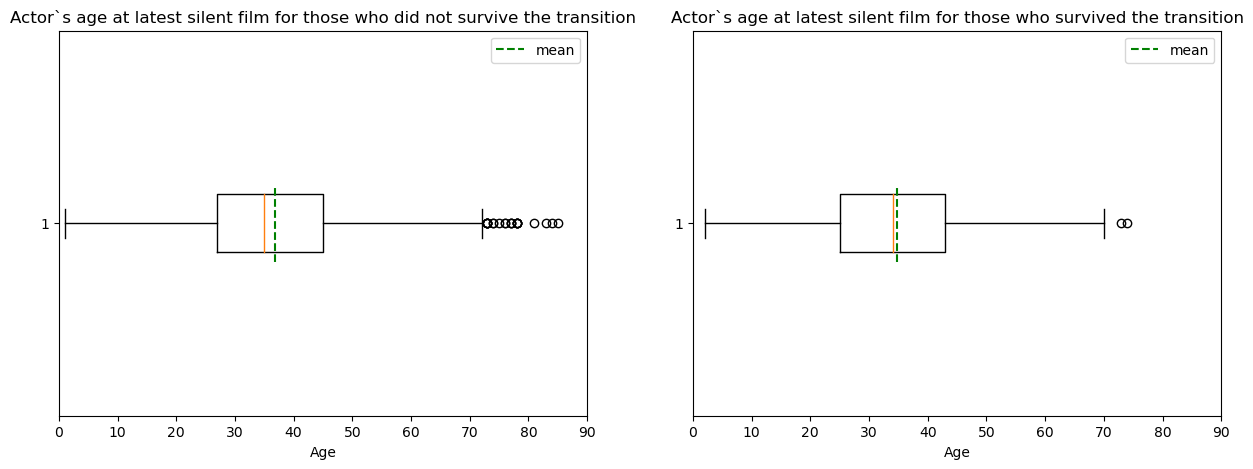

In [56]:
## Fraction of actors that "survived" transition

frac_min = 1
idx = actors_silent['ratio'] <= frac_min
frac = idx.sum() / len(idx)

print('{:.2%} of actors that have starred in at least one silent film have not "survived" the arrival of synchrnized sound sând scores in feature films.'.format(frac))
print('The "survival" criterion is defined as such: if an actor has starred in at least as many non silent films as silent films, they have "survived" this transition. \n')

plt.pie([frac, 1-frac], labels = ['Actors that did not survive the transition', 'Actors that survived the transition'], autopct='%1.1f%%')
plt.title('What is the fraction of actors thet "survived the transition to sound films?')
## Average age of actors that "survived" transition

outliers = actors_silent[(actors_silent['age_last_genre'] <= 0) | (actors_silent['age_last_genre'] >= 100)]
print('{:.2%} of actors are outliers: their age at latest silent film are below 0 or above 100 \n'.format(outliers.shape[0]/actors_silent.shape[0]))

actors_silent_filt = actors_silent[(actors_silent['age_last_genre'] > 0) & (actors_silent['age_last_genre'] < 100)]

non_survivors = actors_silent_filt[actors_silent_filt['ratio'] <= frac_min]
survivors = actors_silent_filt[actors_silent_filt['ratio'] >= frac_min]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
ax1.boxplot(data= non_survivors, x = 'age_last_genre', vert=False)
ax1.vlines(non_survivors.age_last_genre.mean(), ymin = 0.9, ymax = 1.1, color = 'green', ls= '--', label = 'mean')
ax1.set_xlim(0, 90)
ax1.set_xlabel('Age')
ax1.set_title('Actor`s age at latest silent film for those who did not survive the transition')
ax1.legend()

ax2.boxplot(data= survivors, x = 'age_last_genre', vert=False)
ax2.vlines(survivors.age_last_genre.mean(), ymin = 0.9, ymax = 1.1, ls= '--', color = 'green', label = 'mean')
ax2.set_xlim(0, 90)
ax2.set_xlabel('Age')
ax2.set_title('Actor`s age at latest silent film for those who survived the transition')
ax2.legend()


/var/folders/vf/crff2gv97cs_b8t0fhjvy6800000gn/T/ipykernel_52349/3627224571.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/vf/crff2gv97cs_b8t0fhjvy6800000gn/T/ipykernel_52349/3627224571.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


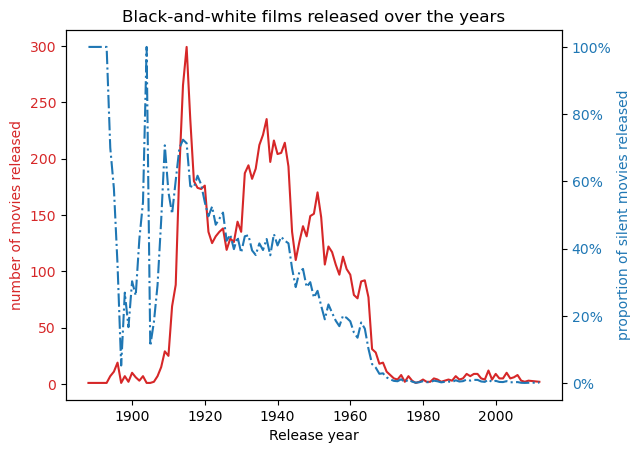

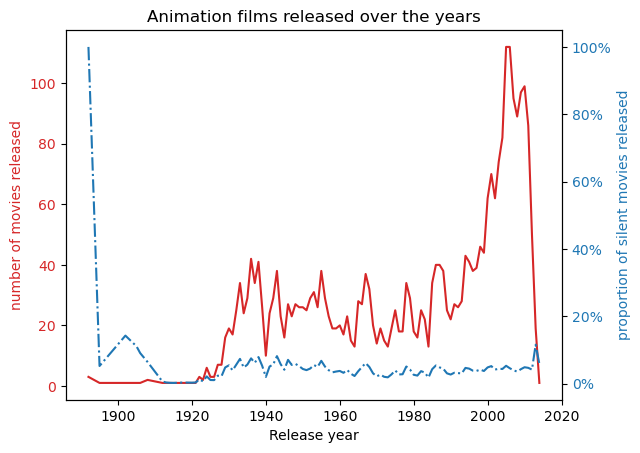

In [ ]:
bw_films, bw_films_by_year = release_by_genre(movie_metadata, 'Black-and-white')
plot_release_by_genre(bw_films_by_year, 'Black-and-white')

anim_films, anim_films_by_year = release_by_genre(movie_metadata, 'Animation')
plot_release_by_genre(anim_films_by_year, 'Animation')

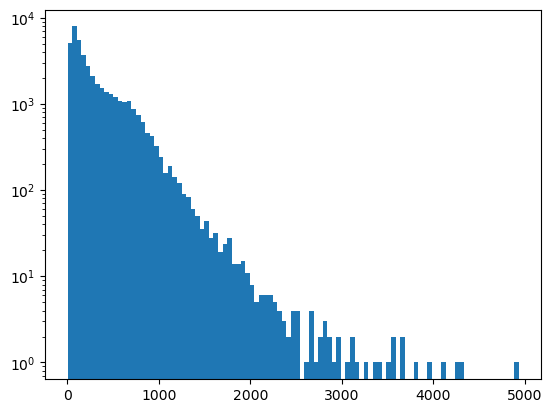

In [ ]:
plot_summaries = load_data_with_columns(DATAFOLDER, 'plot_summaries.txt')

def length_plot(plot):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

    for char in punc:
        if np.isin(char, plot):
            plot.replace(char, '')
    
    split = plot.split()
    return len(split)

plot_summaries['word_count'] = plot_summaries['plot'].apply(length_plot)

plt.hist(plot_summaries['word_count'], bins= round(plot_summaries['word_count'].max()/50))
plt.yscale('log')
plt.show()